In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb

import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from PIL import Image

In [2]:
# from vision.transforms import transforms

In [3]:
%matplotlib inline

In [4]:
train_image_root = '../data/First_round_data/jinnan2_round1_train_20190305/restricted'
annFile = '../data/First_round_data/jinnan2_round1_train_20190305/train_no_poly.json'

In [5]:
def detection_collate(batch):
    targets = []
    imgs = []
    for _, sample in enumerate(batch):
        for _, tup in enumerate(sample):
            if torch.is_tensor(tup):
                imgs.append(tup)
            elif isinstance(tup, type(np.empty(0))):
                annos = torch.from_numpy(tup).float()
                targets.append(annos)

    return (torch.stack(imgs, 0), targets)

In [6]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(256),
    transforms.ToTensor()
])

In [9]:
batch_size = 4
dataset = datasets.coco.CocoDetection(train_image_root, annFile, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=detection_collate, num_workers=4)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
torch.Size([4, 3, 256, 256])
[]


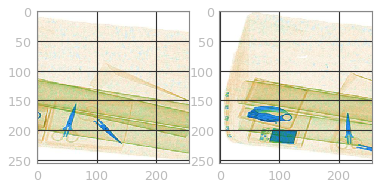

In [12]:
batch_size = 4
dataset = datasets.coco.CocoDetection(train_image_root, annFile, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=detection_collate, num_workers=4)


fig = plt.figure()

for i, (imgs, labels) in enumerate(dataloader):
    print(imgs.shape)
#     print(imgs)
    print(labels)
    
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(imgs[0].numpy().transpose([1,2,0]))
    
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(imgs[1].numpy().transpose([1,2,0])) 

    
    break

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
torch.Size([4, 3, 256, 256])
[{'bbox': [tensor([ 88,  99, 999, 678]), tensor([253, 251, 430, 427]), tensor([118, 116,  51,  94]), tensor([42, 43, 62, 53])], 'minAreaRect': [[tensor([  88,  214, 1020,  685]), tensor([298, 295, 498, 482])], [tensor([ 86,  97, 998, 675]), tensor([256, 289, 434, 461])], [tensor([ 203,   99, 1027,  762]), tensor([249, 246, 424, 424])], [tensor([ 206,  216, 1050,  772]), tensor([291, 253, 487, 446])]], 'segmentation': [], 'area': [], 'category_id': tensor([3, 3, 1, 3]), 'image_id': tensor([0, 1, 2, 3]), 'id': tensor([ 1,  5,  9, 17]), 'iscrowd': tensor([0, 0, 0, 0])}, {'bbox': [tensor([296, 327, 535,   0]), tensor([244, 269, 346, 475]), tensor([118,  75, 109,  96]), tensor([100,  98,  44,  20])], 'minAreaRect': [[tensor([411, 388, 537,  95]), tensor([345, 386, 394, 494])], [tensor([289, 324, 531,   0]), tensor([270, 360, 358, 491])], [tensor([316, 361, 639,   0]), tensor([226,

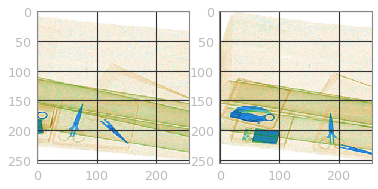

In [13]:
batch_size = 4
dataset = datasets.coco.CocoDetection(train_image_root, annFile, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=4)

fig = plt.figure()

for i, (imgs, labels) in enumerate(dataloader):
    print(imgs.shape)
#     print(imgs)
    print(labels)
    
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(imgs[0].numpy().transpose([1,2,0]))
    
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(imgs[1].numpy().transpose([1,2,0])) 

    
    break

In [ ]:
batch_size = 4
dataset = datasets.coco.CocoDetection(train_image_root, annFile, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=detection_collate, num_workers=4)


fig = plt.figure()

for i, (imgs, labels) in enumerate(dataloader):
    print(imgs.shape)
#     print(imgs)
    print(labels)
    
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(imgs[0].numpy().transpose([1,2,0]))
    
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(imgs[1].numpy().transpose([1,2,0])) 

    
    break

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib.patches as patches

import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from PIL import Image, ImageDraw


from augmentations import SSDAugmentation
from coco import COCODetection

In [2]:
%matplotlib inline

In [3]:
# train_image_root = '/home/left5/code/python/left5/jinnan/data/First_round_data/jinnan2_round1_train_20190305/'
train_image_root = os.path.join(os.getcwd(), '../data/First_round_data/jinnan2_round1_train_20190305')
annFile = 'train_no_poly.json'

In [6]:
def detection_collate(batch):
    targets = []
    imgs = []
    for sample in batch:
        imgs.append(sample[0])
        targets.append(torch.FloatTensor(sample[1]))
    return torch.stack(imgs, 0), targets

batch_size = 4
dataset = COCODetection(train_image_root, annFile, image_set='restricted', transform=SSDAugmentation(416)) # , (104, 117, 123)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=detection_collate, num_workers=4)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


(416, 416, 3)
tensor([[0.6812, 0.4367, 0.7729, 0.5762, 3.0000],
        [0.5688, 0.4625, 0.6125, 0.5556, 3.0000],
        [0.5417, 0.4341, 0.5854, 0.5245, 3.0000],
        [0.5875, 0.3463, 0.7208, 0.6279, 4.0000],
        [0.3729, 0.4625, 0.7021, 0.6202, 4.0000],
        [0.1688, 0.4289, 0.4146, 0.7545, 4.0000]])
[0.68125    0.4366925  0.7729167  0.57622737 3.        ]


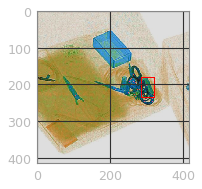

In [17]:
fig = plt.figure()
for i, (imgs, labels) in enumerate(dataloader):
#     print(imgs.shape)
#     print(imgs)
    img = imgs[0].numpy().transpose([1,2,0])
    print(img.shape)
    w = img.shape[0]
    print(labels[0])
    
    lab1 = labels[0][0].numpy()
    print(lab1)
    
#     ax = fig.add_subplot(1, 2, 1)
#     ax.imshow(img)
    
#     print(img.shape)
    
#     ax.add_patch(patches.Rectangle((lab1[0] * 160, lab1[1]* 160), lab1[2]* 160, lab1[3]* 160, linewidth=2, edgecolor='r', fill=False))

#     ax.add_patch(patches.Rectangle((5, 5), 5, 5, linewidth=1, edgecolor='r'))
    
#     ax = fig.add_subplot(1, 2, 2)
#     ax.imshow(imgs[1].numpy().transpose([1,2,0])) 
    
#     print(img)
#     print(img.astype(int32).dtype)
    im = Image.fromarray(img.astype('uint8'))
    draw = ImageDraw.Draw(im)
    draw.rectangle((lab1[0] * w, lab1[1] * w, lab1[2] * w, lab1[3] * w), outline='red', width=3)
    
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(im)
    
    
    break